In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [47]:

df = pd.read_csv('../dataset/new_no_db_labels.csv') #only use with full dataset

/var/folders/xk/fhgbj8qj60n54b05mpfnck0w0000gn/T/ipykernel_15797/946735771.py:1: DtypeWarning: Columns (23,28,29,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/new_no_db_labels.csv') #only use with full dataset


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155361 entries, 0 to 155360
Data columns (total 58 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   formula_pretty                                155358 non-null  object 
 1   nsites                                        155361 non-null  int64  
 2   elements                                      155361 non-null  object 
 3   nelements                                     155361 non-null  int64  
 4   composition                                   155361 non-null  object 
 5   composition_reduced                           155361 non-null  object 
 6   formula_anonymous                             155361 non-null  object 
 7   chemsys                                       155361 non-null  object 
 8   volume                                        155361 non-null  float64
 9   density                                       15

In [49]:
'''drop attributes with mostly  missing values (>95% null), and formula pretty'''

drops = ['formula_pretty','weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy', 
         'weighted_work_function', 'surface_anisotropy', 'shape_factor', 
         'has_reconstructed', 'grain_boundaries', 'e_ij_max', 'n', 'e_ionic', 
         'e_electronic', 'e_total']

df_drops=df[drops]

df.drop(columns = drops, axis=1, inplace=True)

df_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155361 entries, 0 to 155360
Data columns (total 13 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   formula_pretty                       155358 non-null  object 
 1   weighted_surface_energy_EV_PER_ANG2  133 non-null     float64
 2   weighted_surface_energy              133 non-null     float64
 3   weighted_work_function               133 non-null     float64
 4   surface_anisotropy                   133 non-null     float64
 5   shape_factor                         133 non-null     float64
 6   has_reconstructed                    138 non-null     object 
 7   grain_boundaries                     58 non-null      object 
 8   e_ij_max                             3299 non-null    float64
 9   n                                    7287 non-null    float64
 10  e_ionic                              7287 non-null    float64
 11  e_electronic 

In [50]:
df['band_gap'].describe()

count    155353.000000
mean          1.037234
std           1.493406
min           0.000000
25%           0.000000
50%           0.057800
75%           1.821600
max          17.891400
Name: band_gap, dtype: float64

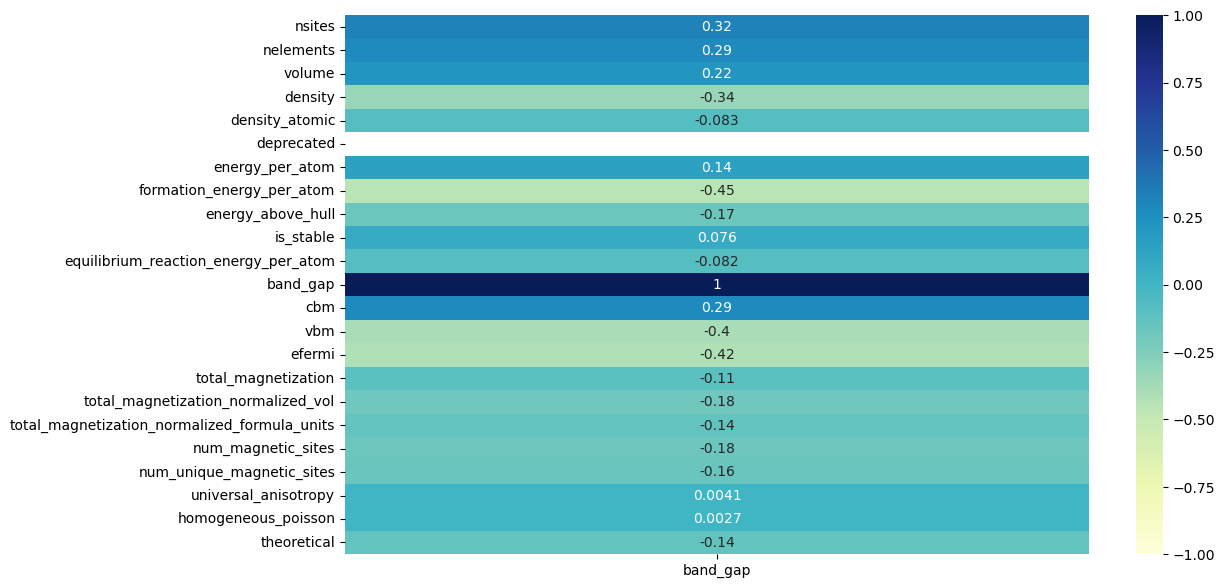

In [51]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 7))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [52]:
categorical_df=df.select_dtypes(include=['object'])
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155361 entries, 0 to 155360
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   elements                   155361 non-null  object
 1   composition                155361 non-null  object
 2   composition_reduced        155361 non-null  object
 3   formula_anonymous          155361 non-null  object
 4   chemsys                    155361 non-null  object
 5   symmetry                   155361 non-null  object
 6   property_name              155361 non-null  object
 7   material_id                155361 non-null  object
 8   structure                  155361 non-null  object
 9   decomposes_to              118418 non-null  object
 10  xas                        60920 non-null   object
 11  is_gap_direct              155353 non-null  object
 12  is_metal                   155353 non-null  object
 13  bandstructure              71727 non-null   

In [53]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.width', 25)

In [54]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155361 entries, 0 to 155360
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   elements                   155361 non-null  object
 1   composition                155361 non-null  object
 2   composition_reduced        155361 non-null  object
 3   formula_anonymous          155361 non-null  object
 4   chemsys                    155361 non-null  object
 5   symmetry                   155361 non-null  object
 6   property_name              155361 non-null  object
 7   material_id                155361 non-null  object
 8   structure                  155361 non-null  object
 9   decomposes_to              118418 non-null  object
 10  xas                        60920 non-null   object
 11  is_gap_direct              155353 non-null  object
 12  is_metal                   155353 non-null  object
 13  bandstructure              71727 non-null   

In [55]:
categorical_df.drop(['elements','composition','composition_reduced','formula_anonymous',
                     'chemsys','property_name','types_of_magnetic_species','possible_species',
                     'types_of_magnetic_species','material_id'
                     ], inplace=True, axis=1)

categorical_df.head()

,symmetry,structure,decomposes_to,xas,is_gap_direct,is_metal,bandstructure,dos,is_magnetic,ordering,bulk_modulus,shear_modulus,has_props
0,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",False,True,{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,NaN,NaN,"{'materials': True, '..."
1,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,True,NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."
2,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,False,NaN,NaN,True,FM,NaN,NaN,"{'materials': True, '..."
3,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,True,NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."
4,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,NaN,False,False,NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."


In [56]:
#get null count for magnetic
print(categorical_df['is_magnetic'].isna().sum())


982


In [57]:
#fill nan with 0 (false) values
categorical_df['is_magnetic'] = categorical_df['is_magnetic'].fillna(False)

categorical_df['is_magnetic'] = categorical_df['is_magnetic'].astype(int)

numerical_df.add(categorical_df['is_magnetic'], axis=0)
categorical_df.drop(['is_magnetic'], axis=1, inplace=True)

categorical_df.info()

/var/folders/xk/fhgbj8qj60n54b05mpfnck0w0000gn/T/ipykernel_15797/2365508944.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_df['is_magnetic'] = categorical_df['is_magnetic'].fillna(False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155361 entries, 0 to 155360
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   symmetry       155361 non-null  object
 1   structure      155361 non-null  object
 2   decomposes_to  118418 non-null  object
 3   xas            60920 non-null   object
 4   is_gap_direct  155353 non-null  object
 5   is_metal       155353 non-null  object
 6   bandstructure  71727 non-null   object
 7   dos            89547 non-null   object
 8   ordering       154379 non-null  object
 9   bulk_modulus   12259 non-null   object
 10  shear_modulus  12259 non-null   object
 11  has_props      155361 non-null  object
dtypes: object(12)
memory usage: 14.2+ MB


In [58]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', 500)

print(categorical_df['has_props'])

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_colwidth', 25)


0              {'materials': True, 'thermo': True, 'xas': True, 'grain_boundaries': False, 'chemenv': True, 'electronic_structure': True, 'absorption': False, 'bandstructure': True, 'dos': True, 'magnetism': True, 'elasticity': False, 'dielectric': False, 'piezoelectric': False, 'surface_properties': False, 'oxi_states': True, 'provenance': True, 'charge_density': True, 'eos': False, 'phonon': False, 'insertion_electrodes': False, 'substrates': True}
1         {'materials': True, 'thermo': True, 'xas': False, 'grain_boundaries': False, 'chemenv': True, 'electronic_structure': True, 'absorption': False, 'bandstructure': False, 'dos': False, 'magnetism': True, 'elasticity': False, 'dielectric': False, 'piezoelectric': False, 'surface_properties': False, 'oxi_states': True, 'provenance': True, 'charge_density': False, 'eos': False, 'phonon': False, 'insertion_electrodes': False, 'substrates': False}
                                                                                          

In [59]:
categorical_df['has_props'] = categorical_df['has_props'].apply(eval)  
# Use eval to convert strings to dictionaries

# Expand the 'has_props' column into individual columns
has_props_bools = pd.json_normalize(categorical_df['has_props'])

numerical_df = pd.concat([numerical_df, has_props_bools], axis=1)
categorical_df = categorical_df.drop(columns=['has_props'])
numerical_df[numerical_df.select_dtypes(include=['bool']).columns] = numerical_df.select_dtypes(include=['bool']).astype(int)

numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155361 entries, 0 to 155360
Data columns (total 44 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   nsites                                        155361 non-null  int64  
 1   nelements                                     155361 non-null  int64  
 2   volume                                        155361 non-null  float64
 3   density                                       155361 non-null  float64
 4   density_atomic                                155361 non-null  float64
 5   deprecated                                    155361 non-null  int64  
 6   energy_per_atom                               152149 non-null  float64
 7   formation_energy_per_atom                     152149 non-null  float64
 8   energy_above_hull                             152149 non-null  float64
 9   is_stable                                     15

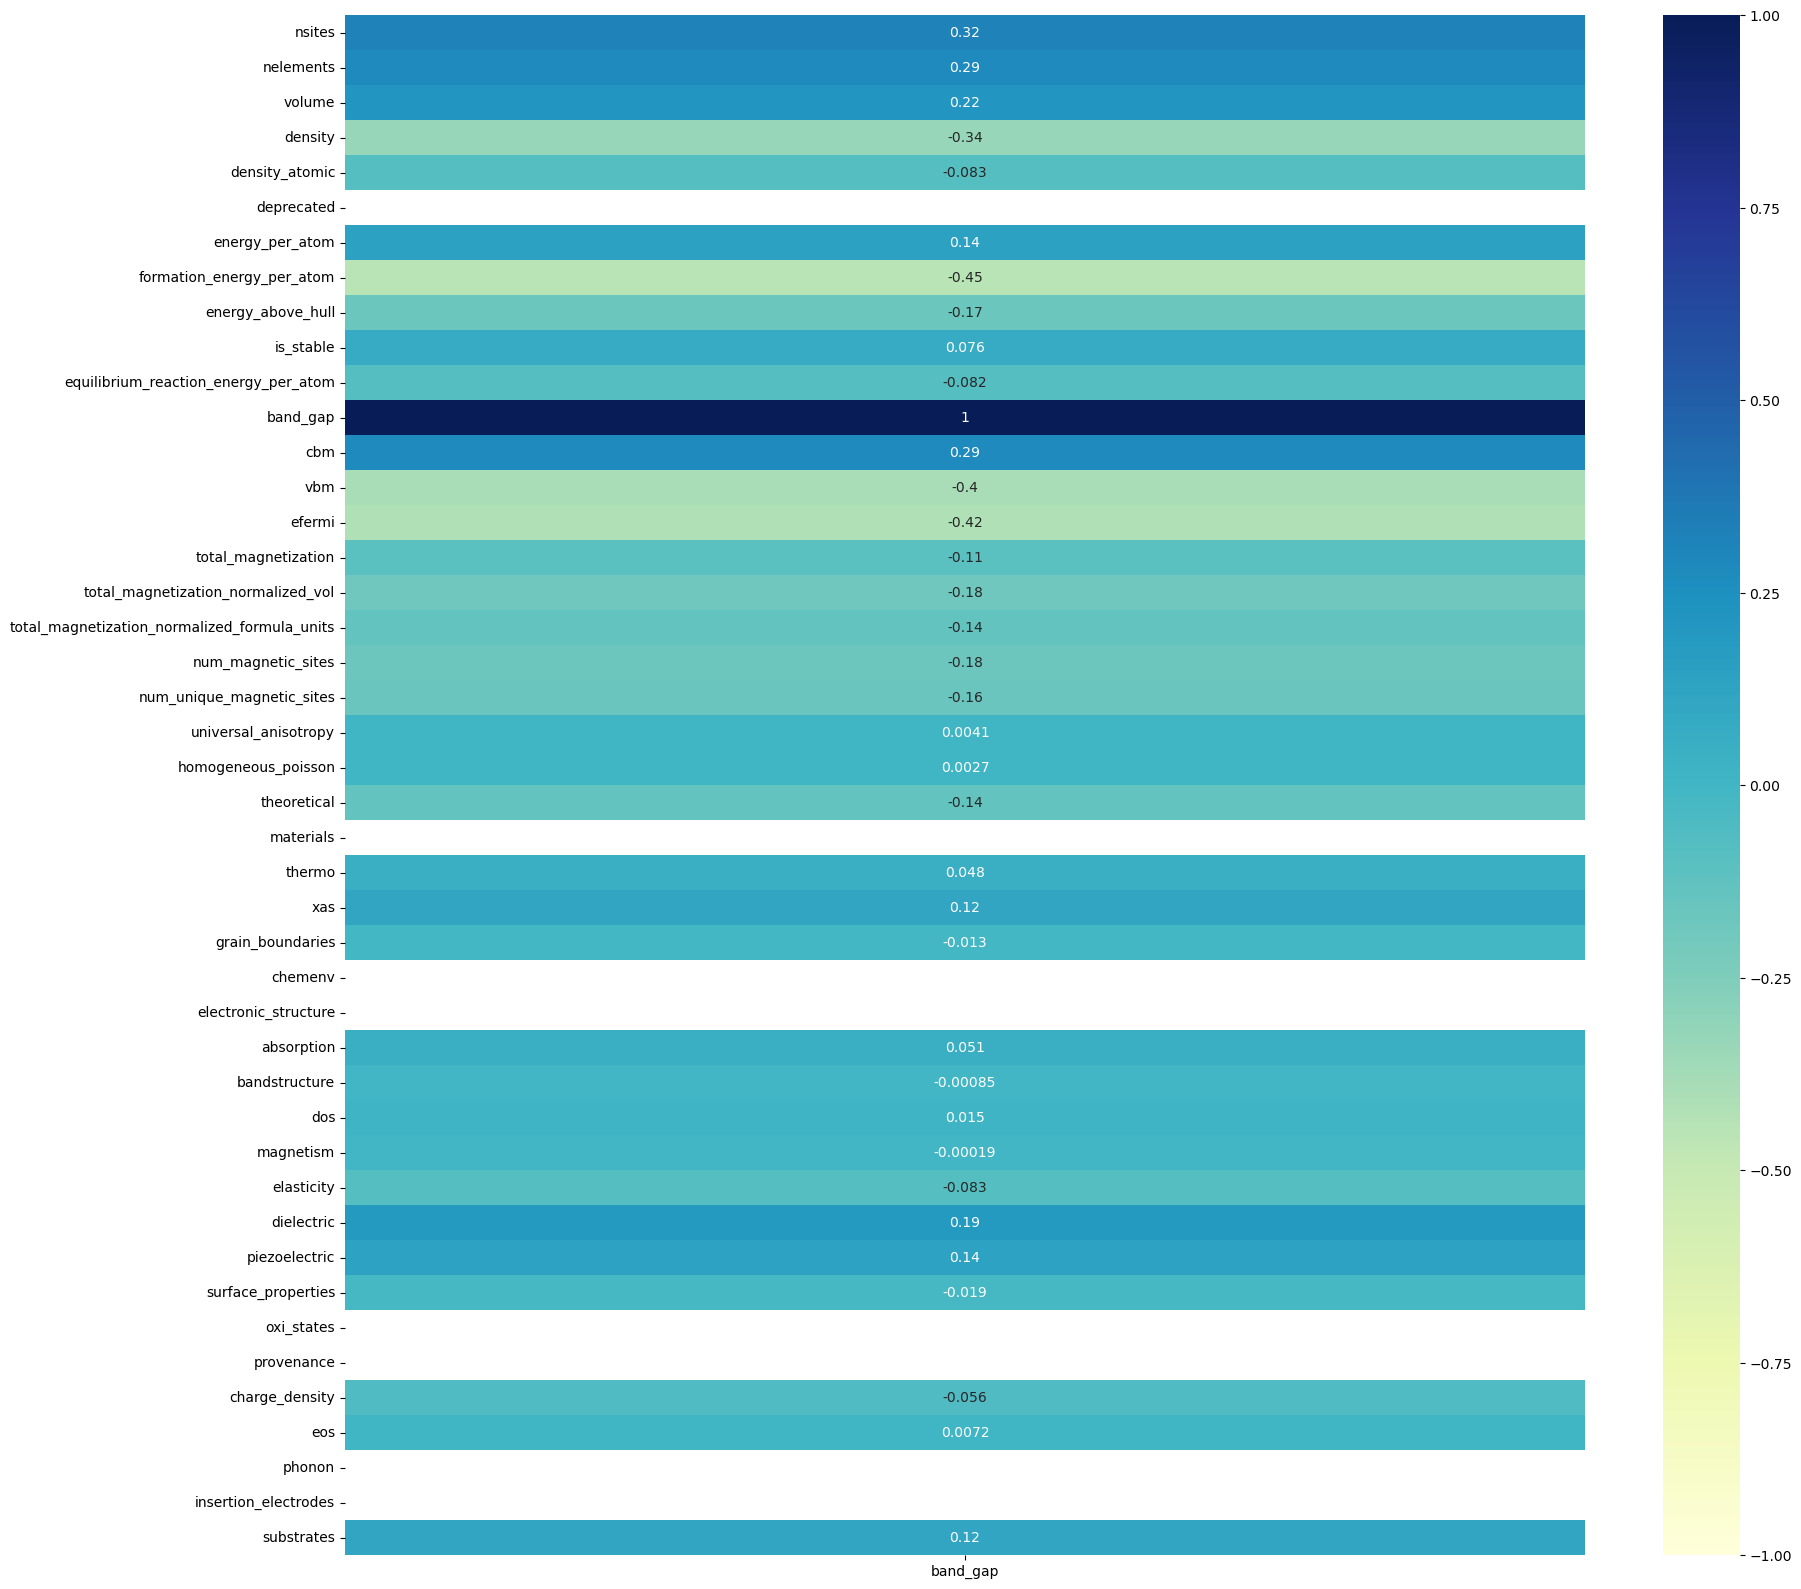

In [60]:
plt.figure(figsize=(20, 20))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [61]:
print((numerical_df['chemenv'] == 0).sum(), (numerical_df['chemenv'] == 1).sum())
print((numerical_df['materials'] == 0).sum(), (numerical_df['materials'] == 1).sum())
print((numerical_df['electronic_structure'] == 0).sum(),  (numerical_df['electronic_structure'] == 1).sum())
print((numerical_df['oxi_states'] == 0).sum(),  (numerical_df['oxi_states'] == 1).sum())
print((numerical_df['provenance'] == 0).sum(),  (numerical_df['provenance'] == 1).sum())
print((numerical_df['phonon'] == 0).sum(),  (numerical_df['phonon'] == 1).sum())
print((numerical_df['insertion_electrodes'] == 0).sum(),  (numerical_df['insertion_electrodes'] == 1).sum())

8 155353
0 155361
8 155353
8 155353
8 155353
155361 0
155361 0


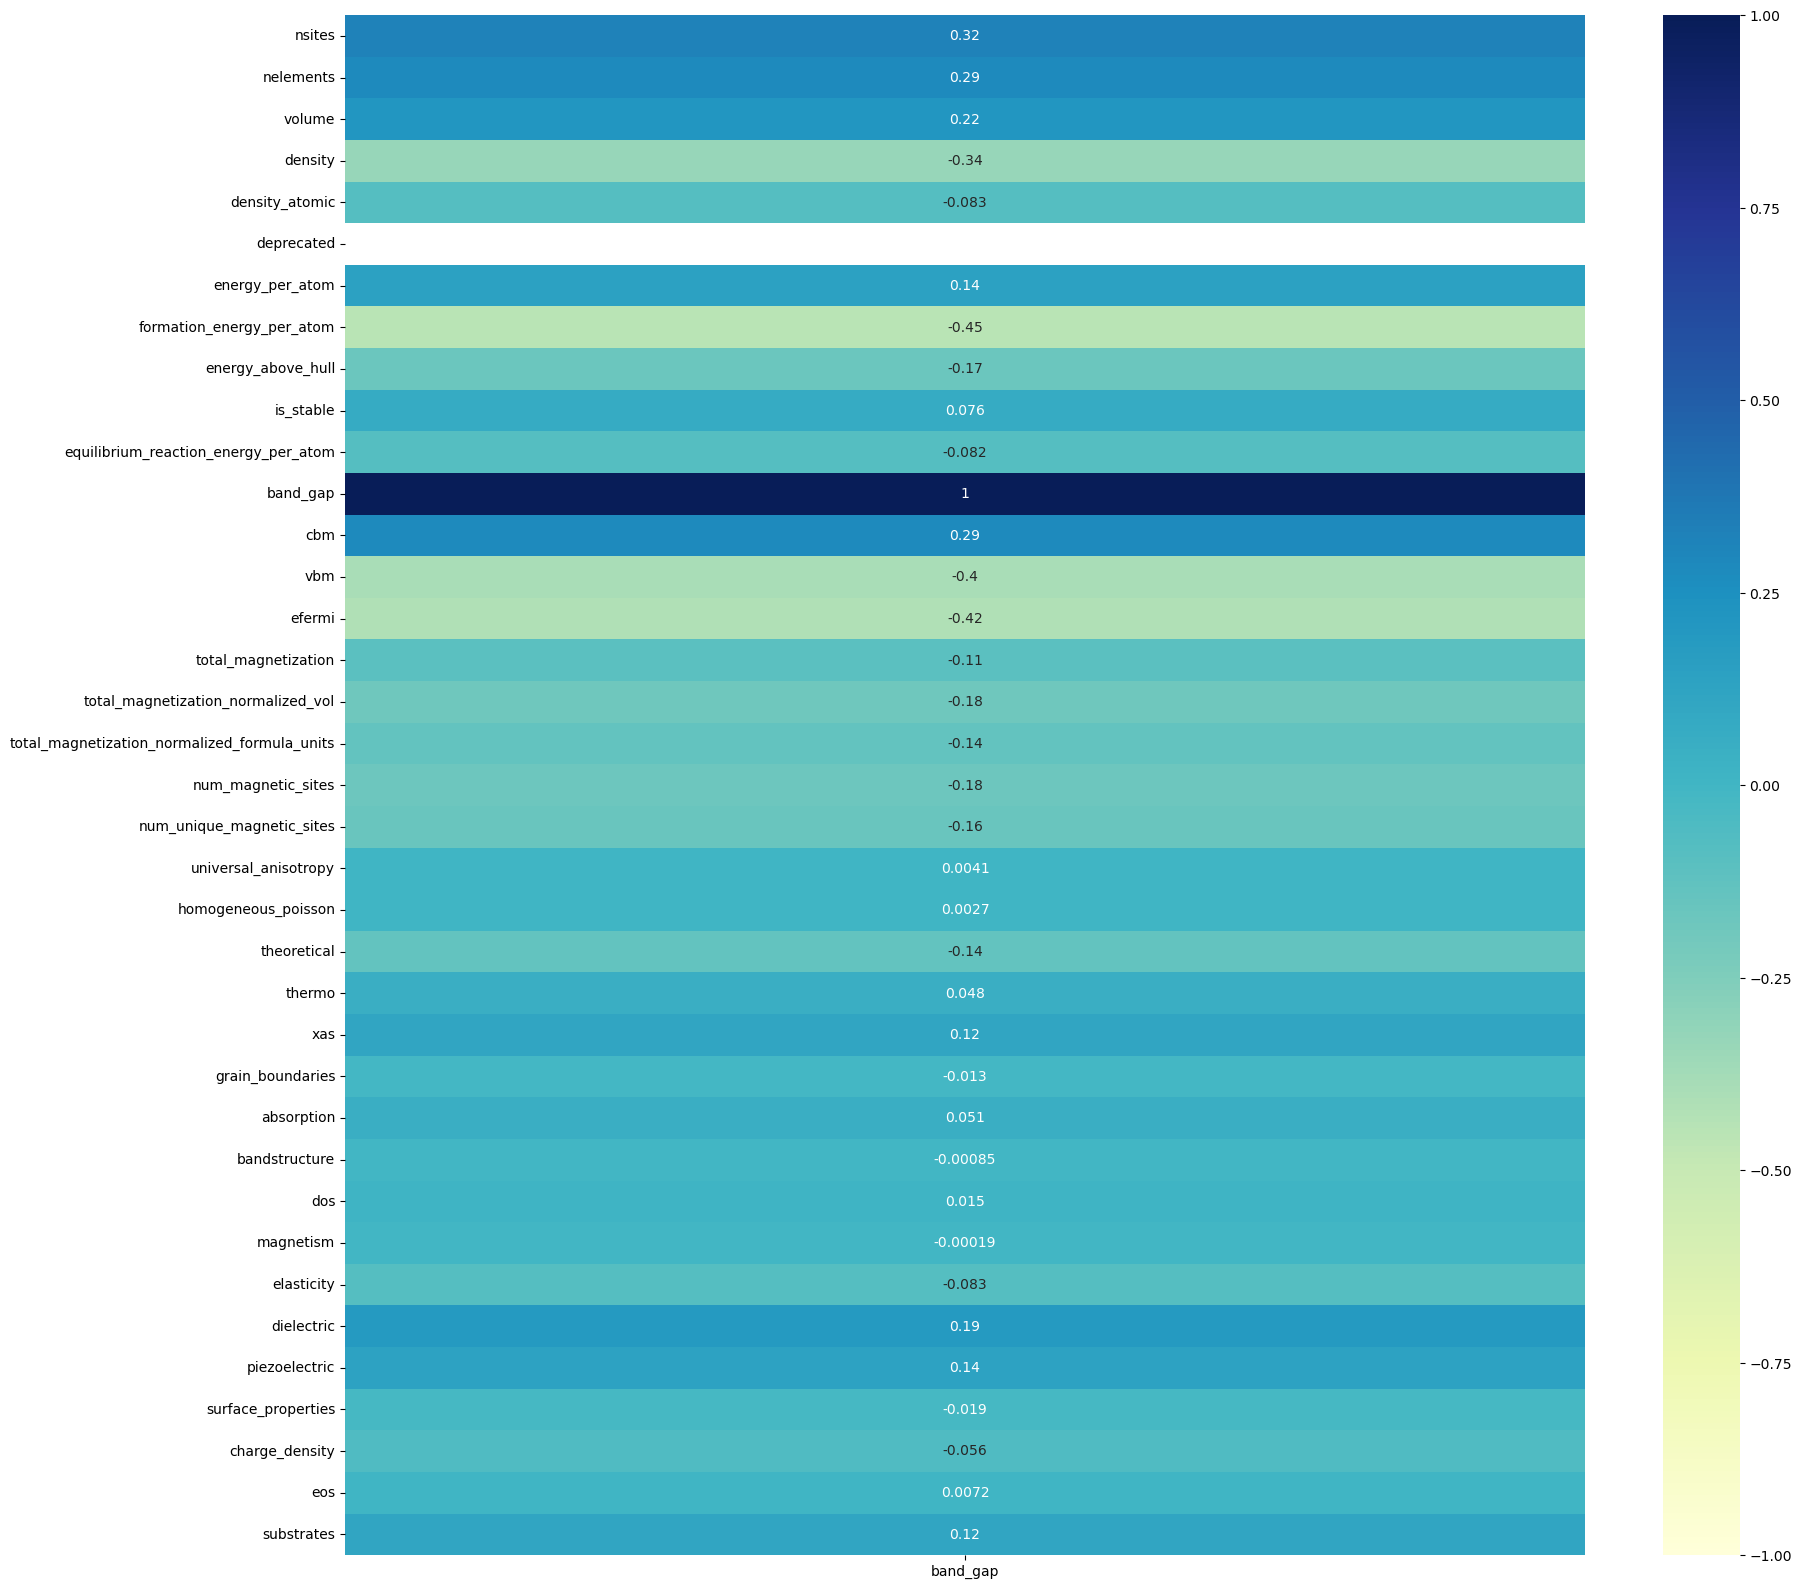

In [62]:
#These values provide no insight - either all 1 or 0 - drop them all
numerical_df.drop(['chemenv', 'materials', 'electronic_structure', 'oxi_states', 'provenance', 'phonon', 'insertion_electrodes'], inplace=True, axis=1)

plt.figure(figsize=(20, 20))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [63]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155361 entries, 0 to 155360
Data columns (total 37 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   nsites                                        155361 non-null  int64  
 1   nelements                                     155361 non-null  int64  
 2   volume                                        155361 non-null  float64
 3   density                                       155361 non-null  float64
 4   density_atomic                                155361 non-null  float64
 5   deprecated                                    155361 non-null  int64  
 6   energy_per_atom                               152149 non-null  float64
 7   formation_energy_per_atom                     152149 non-null  float64
 8   energy_above_hull                             152149 non-null  float64
 9   is_stable                                     15

In [64]:
# def safe_eval(value):
#     try:
#         return eval(value)
#     except:
#         return None 

# # Use safe_eval to convert strings to dictionaries
# categorical_df['shear_modulus'] = categorical_df['shear_modulus'].apply(safe_eval)

# # Expand  'shear_modulus' column into individual columns
# shear_modulus_bools = pd.json_normalize(categorical_df['shear_modulus'])

# # concat has_props_bools with numerical_df
# numerical_df = pd.concat([numerical_df, has_props_bools], axis=1)

# # Convert all boolean columns in has_props_bools to ints
# bool_columns = has_props_bools.select_dtypes(include=['bool']).columns
# has_props_bools[bool_columns] = has_props_bools[bool_columns].astype(int)

# categorical_df.drop(columns=['shear_modulus'], inplace=True)

# # Print shapes to verify the changes



In [68]:
print(numerical_df.shape)
print(categorical_df.shape)


(155361, 37)
(155361, 11)


In [66]:
numerical_df.to_csv('../dataset/numerical_data.csv', index=False)
categorical_df.to_csv('../dataset/categorical_data.csv', index=False)
